# Purpose of this notebook

* Reduce dimension in FIR extracted neural trajectories
* plot dimension per condition





* Question: Do I apply PCA per participant and then average them?
* or do I apply PCA on a group matrix?

In [6]:
import os
import glob
import pandas as pd
import seaborn as sns
%matplotlib inline
from collections.abc import Sequence, Callable
import warnings
from typing import NamedTuple

import numpy as np
import pandas as pd
import xarray as xr
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.figure import Figure
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation
from matplotlib_inline.backend_inline import set_matplotlib_formats
from IPython.display import display, HTML

from time import time
import matplotlib
# matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import numpy as np
import pandas as pd
from sklearn import manifold, datasets


In [4]:
# dataframe parameters
datadir = "/Volumes/spacetop_projects_cue/analysis/fmri/spm/fir/ttl2"
taskname = "pain"
exclude = "sub-0001"
filename = f"sub-*_runtype-{taskname}*roi-MT_tr-42.csv"
common_path = glob.glob(os.path.join(datadir, "sub-*", filename))
filter_path = [path for path in common_path if exclude not in path]

# glob and append to get `combined_df`
dfs = []
for files in filter_path:
    df = pd.read_csv(files)
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

# only filter one's with "stimulus phase"
filtered_df = combined_df[combined_df['condition'] != "rating"]

# Create a new column 'cue' and 'stim' by splitting the 'condition' column
filtered_df[['cue', 'stim']] = filtered_df['condition'].str.split('_', n=1, expand=True)
filtered_df['stimulus'] = filtered_df['sub'].str.cat(filtered_df['ses'], sep='_').str.cat(filtered_df['run'], sep='_')
parsed_df = filtered_df.copy()  # Create a copy to work with



/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_68152/431796797.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[['cue', 'stim']] = filtered_df['condition'].str.split('_', n=1, expand=True)
/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_68152/431796797.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[['cue', 'stim']] = filtered_df['condition'].str.split('_', n=1, expand=True)
/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_68152/431796797.py:

In [15]:
# cue HIGH stim LOW
cHsL = parsed_df[parsed_df['condition'] == "cueH_stimL"]
HL = cHsL.set_index('stimulus')
HLvalues = HL.iloc[:, HL.columns.get_loc("tr1"):-2]
cueHstimL = HLvalues.T

# cue LOW stim LOW
cLsL = parsed_df[parsed_df['condition'] == "cueL_stimL"]
LL = cLsL.set_index('stimulus')
LLvalues = LL.iloc[:, LL.columns.get_loc("tr1"):-2]
cueLstimL = LLvalues.T

# cue HIGH stim MED
cHsM = parsed_df[parsed_df['condition'] == "cueH_stimM"]
HM= cHsM.set_index('stimulus')
HMvalues = HM.iloc[:, HM.columns.get_loc("tr1"):-2]
cueHstimM = HMvalues.T

# cue LOW stim MED
cLsM = parsed_df[parsed_df['condition'] == "cueL_stimM"]
LM = cLsM.set_index('stimulus')
LMvalues = LM.iloc[:, LM.columns.get_loc("tr1"):-2]
cueLstimM = LMvalues.T

# cue HIGH stim HIGH
cHsH = parsed_df[parsed_df['condition'] == "cueH_stimH"]
HH = cHsH.set_index('stimulus')
HHvalues = HH.iloc[:, HH.columns.get_loc("tr1"):-2]
cueHstimH = HHvalues.T

# cue LOW stim HIGH
cLsH = parsed_df[parsed_df['condition'] == "cueL_stimH"]
LH = cLsH.set_index('stimulus')
LHvalues = LH.iloc[:, LH.columns.get_loc("tr1"):-2]
cueLstimH = LHvalues.T

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X.values)

data_transformed = pca.transform(X.values)

pca.components_
# pca.eigenvectors.shape

MDS: 0.01 sec


/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


(-85.03535786081078, 126.47026269911953, -111.41011641909442, 139.65933035731)

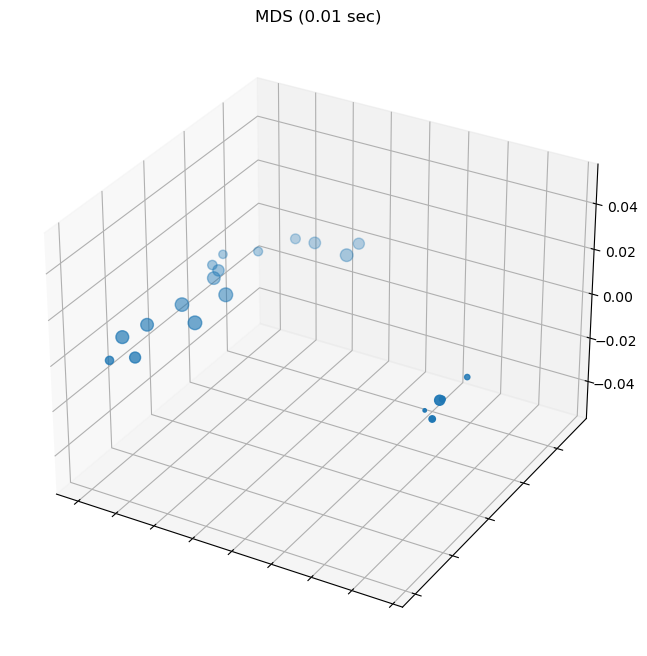

In [7]:
n_components = 3
t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y_cueHstimL = mds.fit_transform(cueHstimL)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1,1,1, projection='3d') 
norm = plt.Normalize(vmin=4, vmax=5)
cmap=plt.cm.Spectral
plt.scatter(Y_cueHstimL[:, 0], Y_cueHstimL[:, 1], Y_cueHstimL[:,2]) #, c=cmap(norm(np.arange(2))), cmap=plt.cm.Spectral)
# plt.scatter(Y[:, 0], Y[:, 1], c=cmap(norm(np.arange(2))), s=50, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

MDS: 0.0075 sec


/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


(-140.08393131375848,
 119.83577330673755,
 -162.8364740633171,
 194.15787926499596)

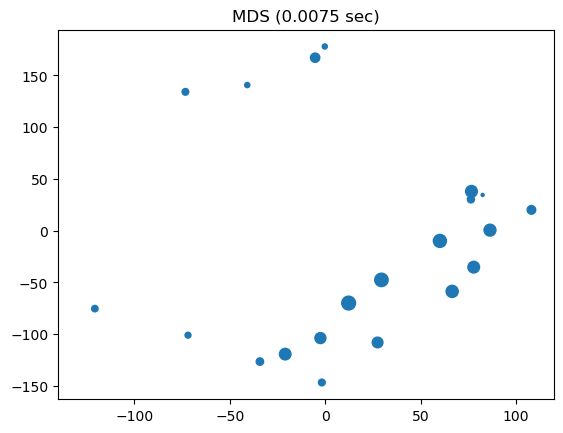

In [8]:
n_components = 3
t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y_cueHstimH = mds.fit_transform(cueHstimH)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
# fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1,1,1, projection='3d') 
norm = plt.Normalize(vmin=4, vmax=5)
cmap=plt.cm.Spectral
plt.scatter(Y_cueHstimH[:, 0], Y_cueHstimH[:, 1], Y_cueHstimH[:,2]) #, c=cmap(norm(np.arange(2))), cmap=plt.cm.Spectral)
# plt.scatter(Y[:, 0], Y[:, 1], c=cmap(norm(np.arange(2))), s=50, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

In [25]:
cueLstimH.shape

(42, 72)

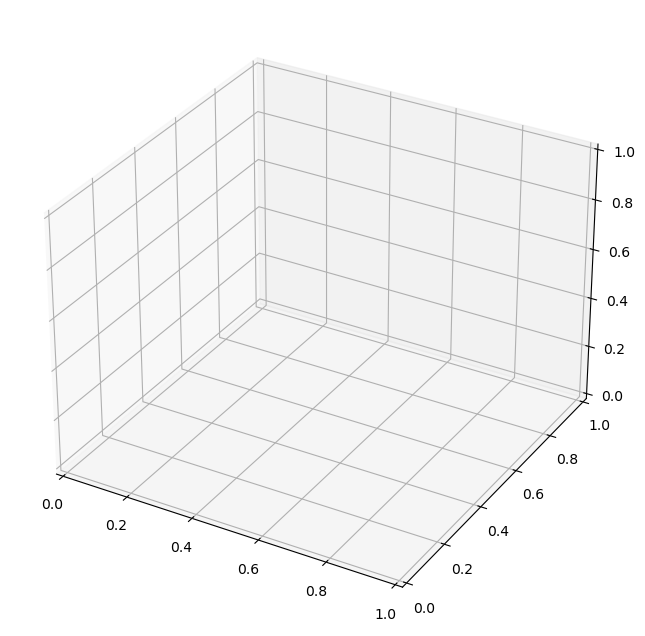

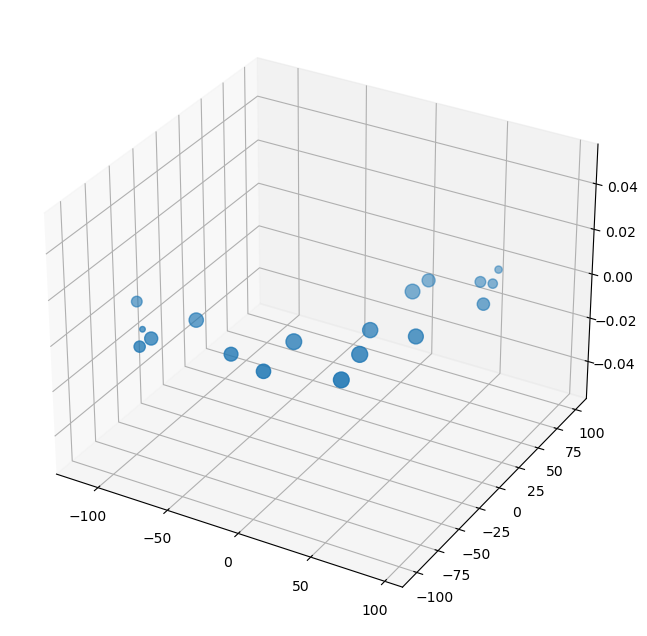

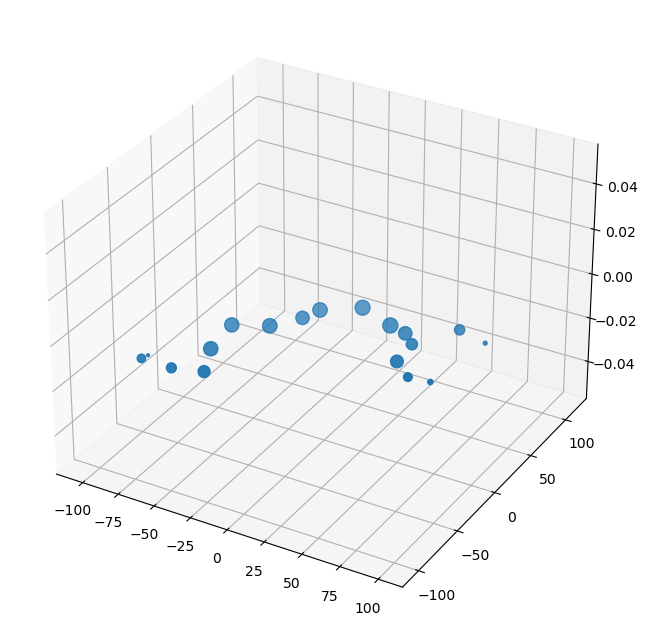

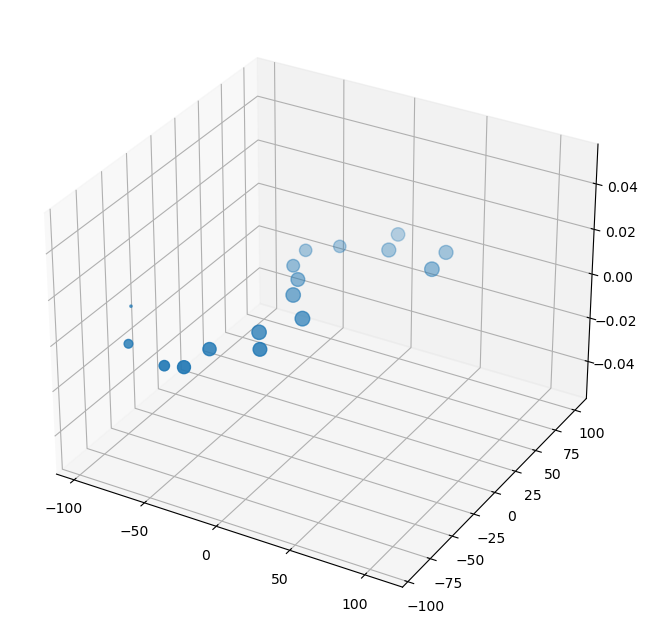

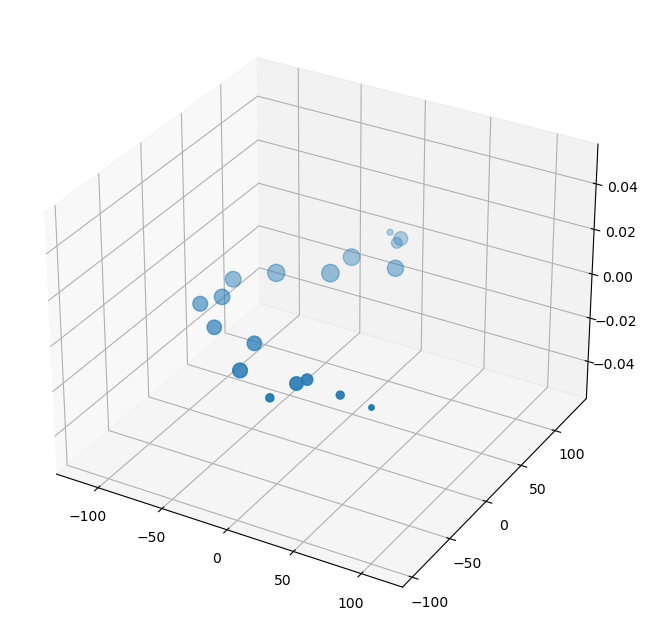

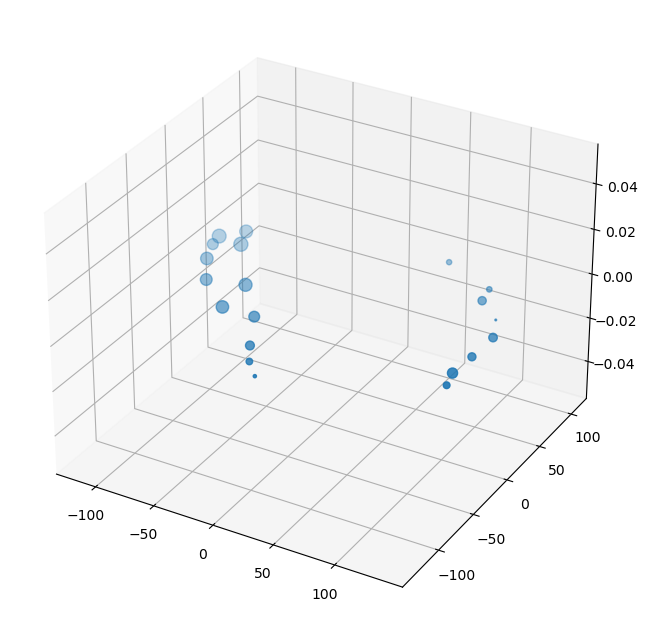

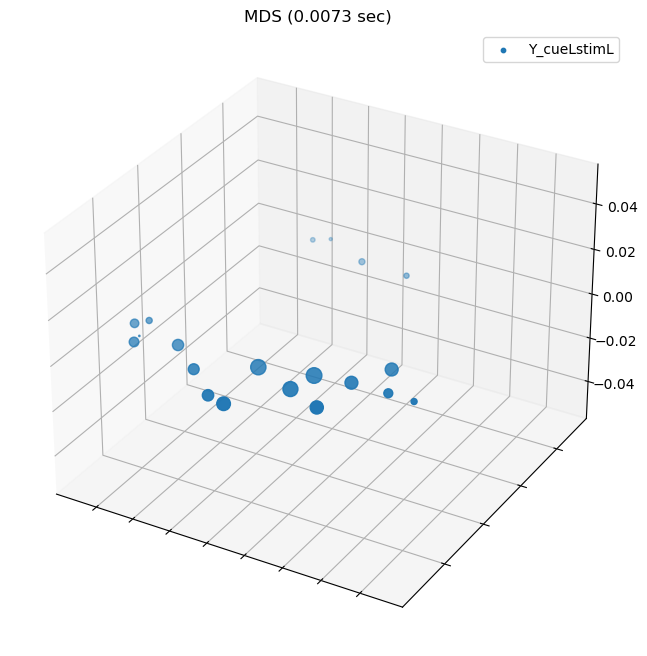

In [43]:
# ... your previous code ...

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
norm = plt.Normalize(vmin=4, vmax=5)
cmap = plt.cm.Spectral

# Plot each dataframe separately
for Y_data, label in [
    (Y_cueHstimH, 'Y_cueHstimH'),
    (Y_cueHstimM, 'Y_cueHstimM'),
    (Y_cueHstimL, 'Y_cueHstimL'),
    (Y_cueLstimH, 'Y_cueLstimH'),
    (Y_cueLstimM, 'Y_cueLstimM'),
    (Y_cueLstimL, 'Y_cueLstimL')
]:
    i = 1
    # The 's' parameter controls marker size, adjust it as needed
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    plt.scatter(Y_data[:, 0], Y_data[:, 1], Y_data[:, 2], label=label) #, s=cmap(norm(np.arange(42))), cmap=cmap)
    i+=1
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# Add a legend to differentiate between the dataframes
plt.legend()

plt.show()


## tryout 2


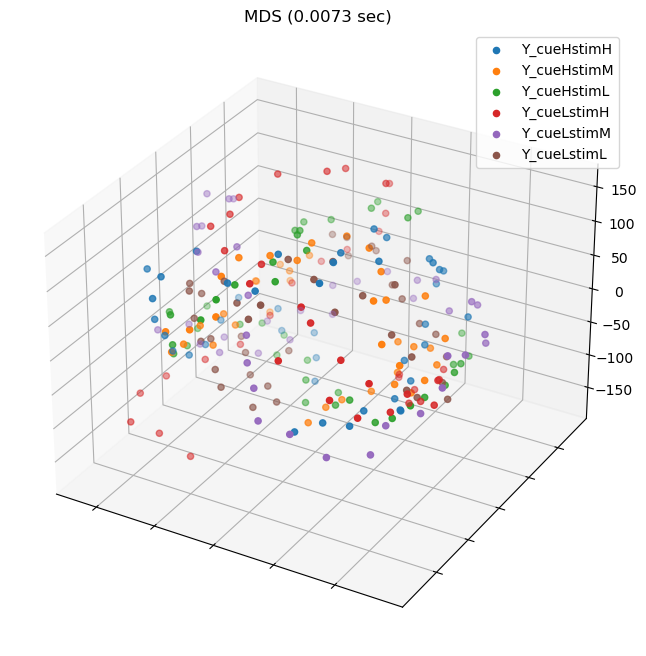

In [45]:
# ... your previous code ...

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
norm = plt.Normalize(vmin=4, vmax=5)
cmap = plt.cm.Spectral

# Plot each dataframe separately
for Y_data, label in [
    (Y_cueHstimH, 'Y_cueHstimH'),
    (Y_cueHstimM, 'Y_cueHstimM'),
    (Y_cueHstimL, 'Y_cueHstimL'),
    (Y_cueLstimH, 'Y_cueLstimH'),
    (Y_cueLstimM, 'Y_cueLstimM'),
    (Y_cueLstimL, 'Y_cueLstimL')
]:
    ax.scatter(Y_data[:, 0], Y_data[:, 1], Y_data[:, 2], label=label)

plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# Add a legend to differentiate between the dataframes
plt.legend()

plt.show()


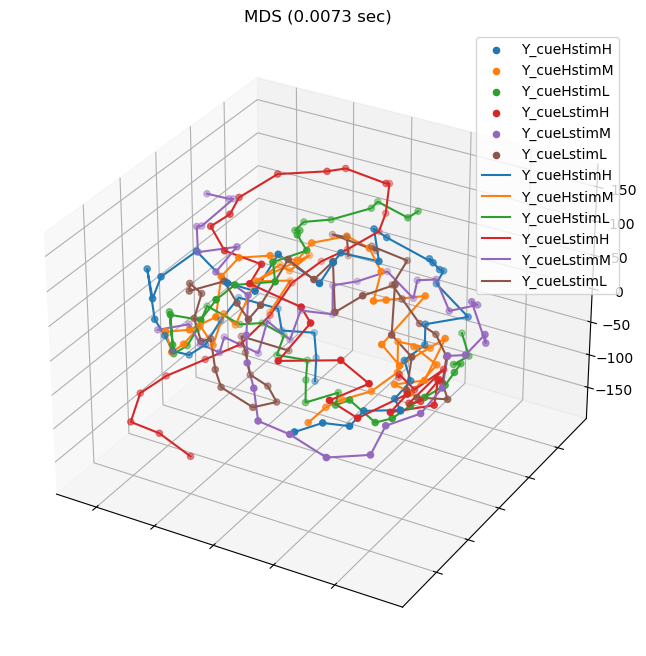

In [46]:
# ... your previous code ...

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
norm = plt.Normalize(vmin=4, vmax=5)
cmap = plt.cm.Spectral

# Plot each dataframe separately with scatter
for Y_data, label in [
    (Y_cueHstimH, 'Y_cueHstimH'),
    (Y_cueHstimM, 'Y_cueHstimM'),
    (Y_cueHstimL, 'Y_cueHstimL'),
    (Y_cueLstimH, 'Y_cueLstimH'),
    (Y_cueLstimM, 'Y_cueLstimM'),
    (Y_cueLstimL, 'Y_cueLstimL')
]:
    ax.scatter(Y_data[:, 0], Y_data[:, 1], Y_data[:, 2], label=label)

# Connect the scattered dots with lines
for Y_data, label in [
    (Y_cueHstimH, 'Y_cueHstimH'),
    (Y_cueHstimM, 'Y_cueHstimM'),
    (Y_cueHstimL, 'Y_cueHstimL'),
    (Y_cueLstimH, 'Y_cueLstimH'),
    (Y_cueLstimM, 'Y_cueLstimM'),
    (Y_cueLstimL, 'Y_cueLstimL')
]:
    ax.plot(Y_data[:, 0], Y_data[:, 1], Y_data[:, 2], label=label)

plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# Add a legend to differentiate between the dataframes
plt.legend()

plt.show()


In [ ]:
# ... your previous code ...

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
norm = plt.Normalize(vmin=4, vmax=5)
cmap = plt.cm.Spectral

# Plot each dataframe separately with scatter
for Y_data, label in [
    (Y_cueHstimH, 'Y_cueHstimH'),
    (Y_cueHstimM, 'Y_cueHstimM'),
    (Y_cueHstimL, 'Y_cueHstimL'),
    (Y_cueLstimH, 'Y_cueLstimH'),
    (Y_cueLstimM, 'Y_cueLstimM'),
    (Y_cueLstimL, 'Y_cueLstimL')
]:
    ax.scatter(Y_data[:, 0], Y_data[:, 1], Y_data[:, 2], label=label)

# Connect the scattered dots with lines
for Y_data, label in [
    (Y_cueHstimH, 'Y_cueHstimH'),
    (Y_cueHstimM, 'Y_cueHstimM'),
    (Y_cueHstimL, 'Y_cueHstimL'),
    (Y_cueLstimH, 'Y_cueLstimH'),
    (Y_cueLstimM, 'Y_cueLstimM'),
    (Y_cueLstimL, 'Y_cueLstimL')
]:
    ax.plot(Y_data[:, 0], Y_data[:, 1], Y_data[:, 2], label=label)

plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# Add a legend to differentiate between the dataframes
plt.legend()

plt.show()


In [73]:
interp_func = interp1d(Y_data[:, 0], Y_data[:, 1], kind='cubic')  # You can adjust the kind of interpolation
smooth_points = interp_func(Y_data[:, 0])
smooth_points

array([-101.81291765,  -85.99717674,  -82.02609846,  -57.39283358,
        -47.91823701,  -36.41832203,  -15.08125323,    9.45462882,
         24.00950882,   43.76928582,   57.17185976,   74.24696633,
        100.07673203,   91.81834985,   75.04502781,   73.24881727,
         50.70240913,   59.48123388,   43.04994499,   -1.8153895 ,
         -8.653246  ,  -35.52778563,  -65.12735946,  -42.03456203,
        -79.01228923,  -72.0151709 ,  -49.09571096,  -79.94124709,
        -90.97052048,  -48.18551059,  -73.5705502 ,  -60.85533395,
        -50.86562934,  -30.04402045,   -2.97390072,   33.01485485,
         74.05124418,   83.85364542,   87.56336396,   93.54672185,
         83.76112078,   59.46934967])

In [106]:
from matplotlib.colors import LinearSegmentedColormap
def create_colormap(colors):
    colormap = LinearSegmentedColormap.from_list("custom_cmap", colors)
    return colormap
colormaps = [
    create_colormap(['#C0334C', '#B31554']),
    create_colormap(['#FF3306', '#FF6F12']),
    create_colormap(['#FFEDB6', '#FFD149']),

    create_colormap(['#1224DE', '#1500FF']),
    create_colormap(['#099279', '#0C6D9B']),
    create_colormap(['#00FF15', '#03D53C'])
                    
]
colormaps = [
    create_colormap(['red', 'orange', 'yellow']),
    create_colormap(['green', 'lime', 'yellowgreen']),
    create_colormap(['blue', 'cyan', 'lightblue']),
    create_colormap(['purple', 'magenta', 'pink']),
    create_colormap(['brown', 'red', 'orange']),
    create_colormap(['gray', 'silver', 'white'])
]

In [104]:
colormaps

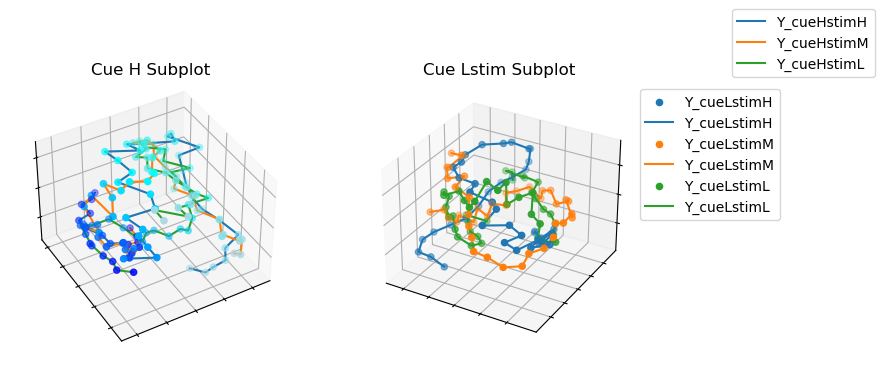

In [110]:
# ... your previous code ...
from scipy.interpolate import splrep, splev, interp1d
fig = plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)

# First subplot for Y_cueHstimH, Y_cueHstimM, Y_cueHstimL
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.set_title("Cue H Subplot")

# Plot and connect the scattered dots for the first set of dataframes
for Y_data, label in [
    (Y_cueHstimH, 'Y_cueHstimH'),
    (Y_cueHstimM, 'Y_cueHstimM'),
    (Y_cueHstimL, 'Y_cueHstimL')
]:
    colormap = colormaps[i]
    colors = np.linspace(0, 1, len(Y_data)) 
    ax1.scatter(Y_data[:, 0], Y_data[:, 1], Y_data[:, 2], c=colors, cmap=colormap)#label=label)

    # Generate a smooth curve through the scattered points
    # tck, u = splrep(Y_data[:, 0], Y_data[:, 1], s=0)  # You can adjust the smoothing factor 's'
    # smooth_points = splev(u, tck)

    interp_func = interp1d(Y_data[:, 0], Y_data[:, 1], kind='cubic')  # You can adjust the kind of interpolation
    smooth_points = interp_func(Y_data[:, 0])
    # spl = splrep(Y_data[:, 0], Y_data[:, 1])
    ax1.plot(Y_data[:, 0], smooth_points, Y_data[:, 2], label=label)
viewpoints = [(20, 30), (30, 45), (40, 60)]  # List of (elev, azim) angles

for i, (elev, azim) in enumerate(viewpoints):
    ax1.view_init(elev=elev, azim=azim)
# ax1.view_init()  # Adjust the elev and azim angles as needed

ax1.xaxis.set_major_formatter(NullFormatter())
ax1.yaxis.set_major_formatter(NullFormatter())
ax1.zaxis.set_major_formatter(NullFormatter())
# ax1.legend()
# ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
legend1 = ax1.legend(loc='upper left', bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

# Second subplot for Y_cueLstimH, Y_cueLstimM, Y_cueLstimL
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.set_title("Cue Lstim Subplot")

# Plot and connect the scattered dots for the second set of dataframes
for Y_data, label in [
    (Y_cueLstimH, 'Y_cueLstimH'),
    (Y_cueLstimM, 'Y_cueLstimM'),
    (Y_cueLstimL, 'Y_cueLstimL')
]:
    ax2.scatter(Y_data[:, 0], Y_data[:, 1], Y_data[:, 2], label=label)
    ax2.plot(Y_data[:, 0], Y_data[:, 1], Y_data[:, 2], label=label)

ax2.view_init()  # Adjust the elev and azim angles as needed

ax2.xaxis.set_major_formatter(NullFormatter())
ax2.yaxis.set_major_formatter(NullFormatter())
ax2.zaxis.set_major_formatter(NullFormatter())
# ax2.legend()
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.tight_layout()
plt.show()


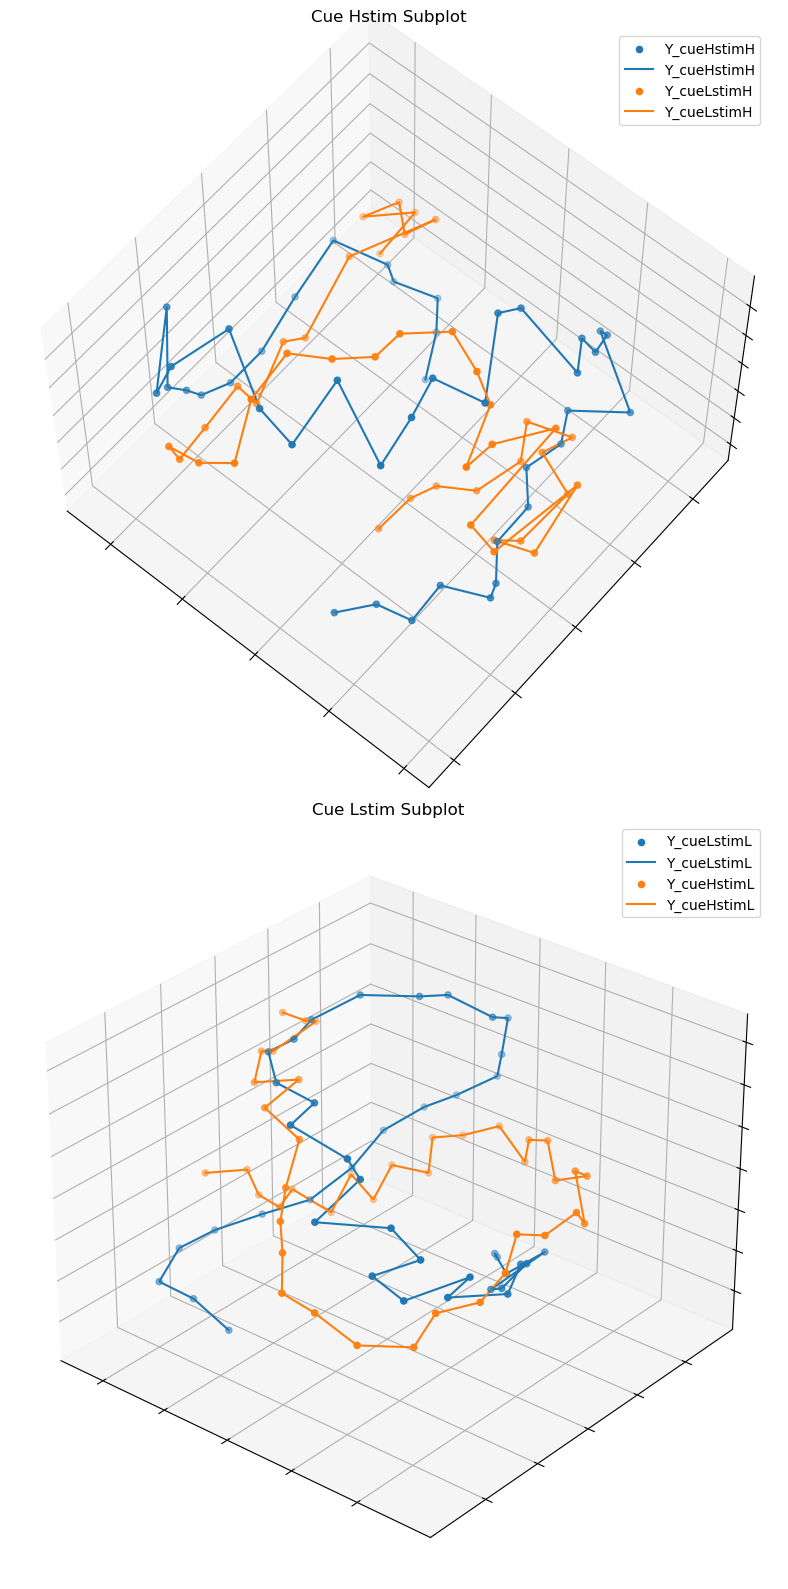

In [163]:
# ... your previous code ...

fig = plt.figure(figsize=(15, 16))

# First subplot for Y_cueHstimH, Y_cueHstimM, Y_cueHstimL
ax1 = fig.add_subplot(2, 1, 1, projection='3d')
ax1.set_title("Cue Hstim Subplot")

# Plot and connect the scattered dots for the first set of dataframes
for Y_data, label in [
    (Y_cueHstimH, 'Y_cueHstimH'),
    (Y_cueHstimM, 'Y_cueLstimH'),
    # (Y_cueHstimL, 'Y_cueHstimL')
]:
    ax1.scatter(Y_data[:, 0], Y_data[:, 1], Y_data[:, 2], label=label)
    ax1.plot(Y_data[:, 0], Y_data[:, 1], Y_data[:, 2], label=label)
ax1.view_init(elev=60, azim=-50)
ax1.xaxis.set_major_formatter(NullFormatter())
ax1.yaxis.set_major_formatter(NullFormatter())
ax1.zaxis.set_major_formatter(NullFormatter())
ax1.legend()

# Second subplot for Y_cueLstimH, Y_cueLstimM, Y_cueLstimL
ax2 = fig.add_subplot(2, 1, 2, projection='3d')
ax2.set_title("Cue Lstim Subplot")

# Plot and connect the scattered dots for the second set of dataframes
for Y_data, label in [
    (Y_cueLstimH, 'Y_cueLstimL'),
    (Y_cueLstimM, 'Y_cueHstimL'),
    # (Y_cueLstimL, 'Y_cueLstimL')
]:
    ax2.scatter(Y_data[:, 0], Y_data[:, 1], Y_data[:, 2], label=label)
    ax2.plot(Y_data[:, 0], Y_data[:, 1], Y_data[:, 2], label=label)

ax2.view_init(elev=30, azim=-50)  # Adjust the elev and azim angles as needed

ax2.xaxis.set_major_formatter(NullFormatter())
ax2.yaxis.set_major_formatter(NullFormatter())
ax2.zaxis.set_major_formatter(NullFormatter())
ax2.legend()

plt.tight_layout()
plt.show()


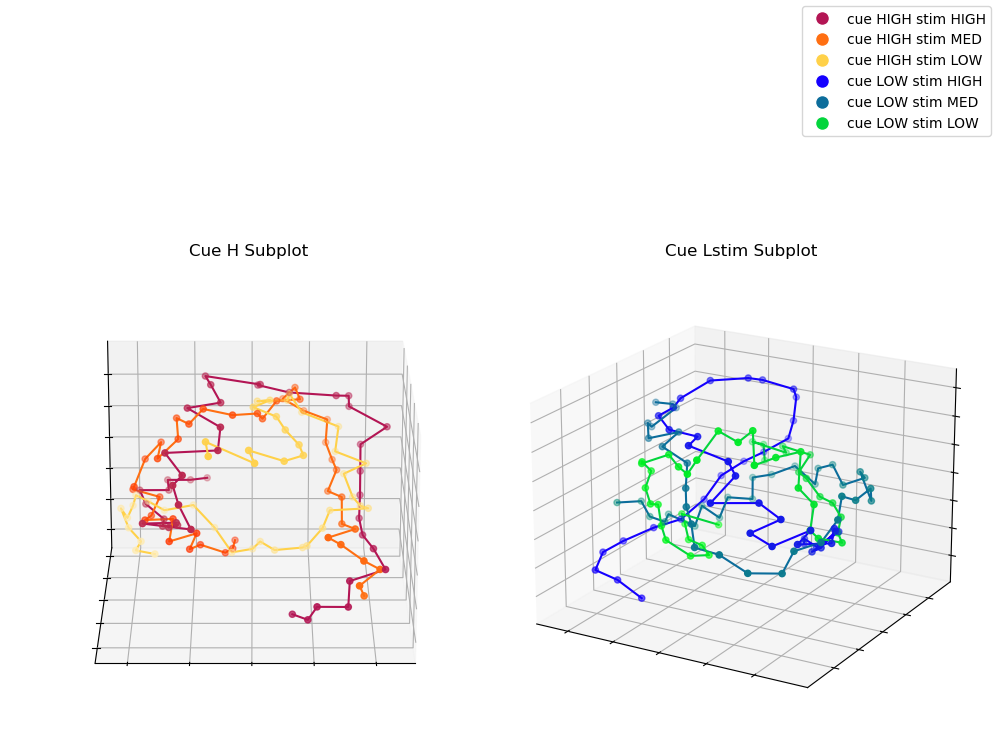

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.interpolate import interp1d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

# ... your data and preprocessing code ...

# Create custom colormaps using hex codes
from matplotlib.colors import LinearSegmentedColormap
def create_colormap(colors):
    colormap = LinearSegmentedColormap.from_list("custom_cmap", colors)
    return colormap
hex_colormaps = [
    create_colormap(['#C0334C', '#B31554']),
    create_colormap(['#FF3306', '#FF6F12']),
    create_colormap(['#FFEDB6', '#FFD149']),

    create_colormap(['#1224DE', '#1500FF']),
    create_colormap(['#099279', '#0C6D9B']),
    create_colormap(['#00FF15', '#03D53C'])
                    
]

colorline = ['#B31554', '#FF6F12', '#FFD149', '#1500FF', '#0C6D9B', '#03D53C']
# colormaps = [
#     create_colormap(['red', 'orange', 'yellow']),
#     create_colormap(['green', 'lime', 'yellowgreen']),
#     create_colormap(['blue', 'cyan', 'lightblue']),
#     create_colormap(['purple', 'magenta', 'pink']),
#     create_colormap(['brown', 'red', 'orange']),
#     create_colormap(['gray', 'silver', 'white'])
# ]
# ... your plotting code ...

# NOTE: _________ creaete plot parameters
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)

# NOTE: _________ high cues plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title("Cue H Subplot")

for i, (Y_data, label) in enumerate([
    (Y_cueHstimH, 'Y_cueHstimH'),
    (Y_cueHstimM, 'Y_cueHstimM'),
    (Y_cueHstimL, 'Y_cueHstimL')
]):
    
    colormap = hex_colormaps[i]
    colors = np.linspace(0, 1, len(Y_data))  # You can adjust the colors range
    ax1.scatter(Y_data[:, 0], Y_data[:, 1], Y_data[:, 2], c=colors, cmap=colormap)

    interp_func = interp1d(Y_data[:, 0], Y_data[:, 1], kind='cubic')
    smooth_points = interp_func(Y_data[:, 0])
    ax1.plot(Y_data[:, 0], smooth_points, Y_data[:, 2], color=colorline[i])

ax1.xaxis.set_major_formatter(NullFormatter())
ax1.yaxis.set_major_formatter(NullFormatter())
ax1.zaxis.set_major_formatter(NullFormatter())

ax1.view_init(elev=20, azim=90)  # Adjust the elev and azim angles as needed


# NOTE: _________ low cue plots
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.set_title("Cue Lstim Subplot")

for i, (Y_data, label) in enumerate([
    (Y_cueLstimH, 'Y_cueLstimL'),
    (Y_cueLstimM, 'Y_cueLstimL'),
    (Y_cueLstimL, 'Y_cueLstimL')
]):
    
    colormap = hex_colormaps[i+3]
    colors = np.linspace(0, 1, len(Y_data))  # You can adjust the colors range
    ax2.scatter(Y_data[:, 0], Y_data[:, 1], Y_data[:, 2], c=colors, cmap=colormap)
    ax2.plot(Y_data[:, 0], Y_data[:, 1], Y_data[:, 2], color=colorline[i+3])


ax2.xaxis.set_major_formatter(NullFormatter())
ax2.yaxis.set_major_formatter(NullFormatter())
ax2.zaxis.set_major_formatter(NullFormatter())
# legend2 = ax2.legend(loc='upper left', bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
ax2.view_init(elev=20, azim=-60)  # Adjust the elev and azim angles as needed


dummy_labels = ['cue HIGH stim HIGH', 'cue HIGH stim MED', 'cue HIGH stim LOW', 'cue LOW stim HIGH', 'cue LOW stim MED', 'cue LOW stim LOW']
dummy_colors = colorline

dummy_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                            markersize=10, markerfacecolor=color)
                 for label, color in zip(dummy_labels, dummy_colors)]

# Create a legend using the dummy handles and labels
fig.legend(handles=dummy_handles, labels=dummy_labels, loc='upper right')

plt.tight_layout()
plt.show()



# spectral embedding

SpectralEmbedding: 0.01 sec
SpectralEmbedding: 0.015 sec
SpectralEmbedding: 0.018 sec
SpectralEmbedding: 0.026 sec
SpectralEmbedding: 0.029 sec
SpectralEmbedding: 0.031 sec


(-0.07362828850701314,
 0.08610229953156355,
 -0.08121431486116683,
 0.10219690020595133)

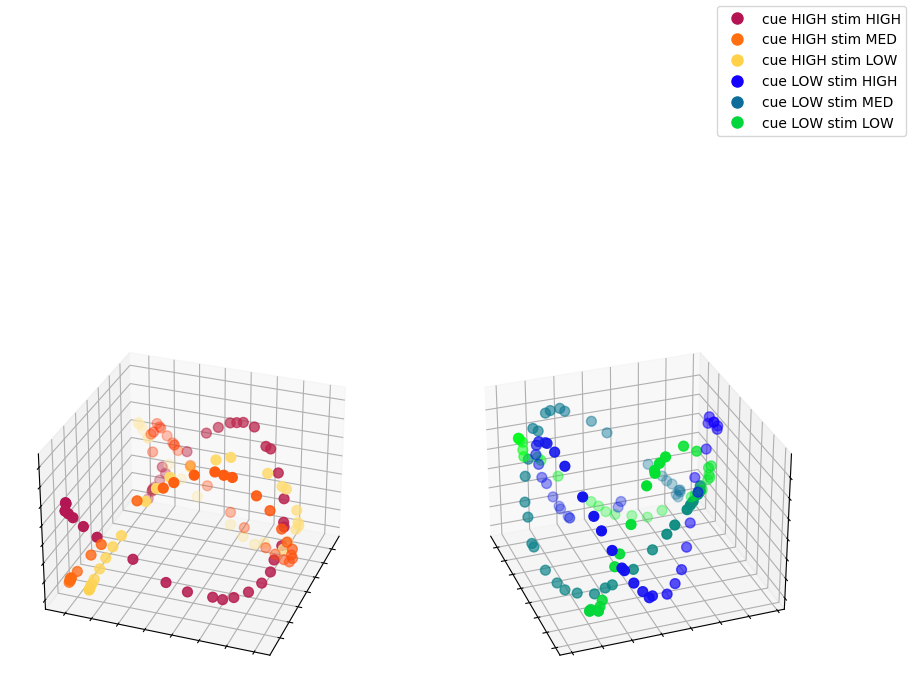

In [213]:
t0 = time()
n_neighbors=10
n_components=3
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)
for i, (Y_data, label) in enumerate([
    (Y_cueHstimH, 'Y_cueHstimH'),
    (Y_cueHstimM, 'Y_cueHstimM'),
    (Y_cueHstimL, 'Y_cueHstimL')
]):
    se = manifold.SpectralEmbedding(n_components=n_components,
    n_neighbors=n_neighbors)
    Y = se.fit_transform(Y_data)
    t1 = time()
    print("SpectralEmbedding: %.2g sec" % (t1-t0))

    colormap = hex_colormaps[i]
    colors = np.linspace(0, 1, len(Y_data))  # You can adjust the colors range
    ax1.scatter(Y[:, 0], Y[:, 1], Y[:,2], c=colors, cmap=colormap, s=50)
ax1.view_init(elev=30, azim=20)  # Adjust the elev and azim angles as needed

# ax1.title("SpectralEmbedding (%.2g sec)" % (t1-t0))
ax1.xaxis.set_major_formatter(NullFormatter())
ax1.yaxis.set_major_formatter(NullFormatter())
ax1.zaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


ax2 = fig.add_subplot(1, 2, 2, projection='3d')
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)
for i, (Y_data, label) in enumerate([
    (Y_cueLstimH, 'Y_cueLstimH'),
    (Y_cueLstimM, 'Y_cueLstimM'),
    (Y_cueLstimL, 'Y_cueLstimL')
]):
    se = manifold.SpectralEmbedding(n_components=n_components,
    n_neighbors=n_neighbors)
    Y = se.fit_transform(Y_data)
    t1 = time()
    print("SpectralEmbedding: %.2g sec" % (t1-t0))

    colormap = hex_colormaps[i+3]
    colors = np.linspace(0, 1, len(Y_data))  # You can adjust the colors range
    ax2.scatter(Y[:, 0], Y[:, 1], Y[:,2], c=colors, cmap=colormap, s=50)
ax2.view_init(elev=30, azim=-20)  # Adjust the elev and azim angles as needed

# ax1.title("SpectralEmbedding (%.2g sec)" % (t1-t0))
ax2.xaxis.set_major_formatter(NullFormatter())
ax2.yaxis.set_major_formatter(NullFormatter())
ax2.zaxis.set_major_formatter(NullFormatter())

dummy_labels = ['cue HIGH stim HIGH', 'cue HIGH stim MED', 'cue HIGH stim LOW', 'cue LOW stim HIGH', 'cue LOW stim MED', 'cue LOW stim LOW']
dummy_colors = colorline

dummy_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                            markersize=10, markerfacecolor=color)
                 for label, color in zip(dummy_labels, dummy_colors)]

# Create a legend using the dummy handles and labels
fig.legend(handles=dummy_handles, labels=dummy_labels, loc='upper right')

plt.axis('tight')

## potentially interactive

In [217]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.interpolate import interp1d
from sklearn import manifold
from time import time
from matplotlib.ticker import NullFormatter
from ipywidgets import interactive, IntSlider, FloatSlider

# ... your data and preprocessing code ...

# Create custom colormaps using hex codes
# ... your colormap creation code ...

colorline = ['#B31554', '#FF6F12', '#FFD149', '#1500FF', '#0C6D9B', '#03D53C']

# Interactive plot function
def plot_spectral_embedding(elev, azim):
    t0 = time()
    fig = plt.figure(figsize=(10, 5))
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)

    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.set_title("Cue H Subplot")

    for i, (Y_data, label) in enumerate([
        (Y_cueHstimH, 'Y_cueHstimH'),
        (Y_cueHstimM, 'Y_cueHstimM'),
        (Y_cueHstimL, 'Y_cueHstimL')
    ]):
        se = manifold.SpectralEmbedding(n_components=3, n_neighbors=10)
        Y = se.fit_transform(Y_data)
        t1 = time()
        print("SpectralEmbedding: %.2g sec" % (t1 - t0))

        colormap = hex_colormaps[i]
        colors = np.linspace(0, 1, len(Y_data))  # You can adjust the colors range
        ax1.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=colors, cmap=colormap, s=50)

    ax1.view_init(elev=elev, azim=azim)
    ax1.xaxis.set_major_formatter(NullFormatter())
    ax1.yaxis.set_major_formatter(NullFormatter())
    ax1.zaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)

    for i, (Y_data, label) in enumerate([
        (Y_cueLstimH, 'Y_cueLstimH'),
        (Y_cueLstimM, 'Y_cueLstimM'),
        (Y_cueLstimL, 'Y_cueLstimL')
    ]):
        se = manifold.SpectralEmbedding(n_components=3, n_neighbors=10)
        Y = se.fit_transform(Y_data)
        t1 = time()
        print("SpectralEmbedding: %.2g sec" % (t1 - t0))

        colormap = hex_colormaps[i + 3]
        colors = np.linspace(0, 1, len(Y_data))  # You can adjust the colors range
        ax2.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=colors, cmap=colormap, s=50)

    ax2.view_init(elev=elev, azim=azim)
    ax2.xaxis.set_major_formatter(NullFormatter())
    ax2.yaxis.set_major_formatter(NullFormatter())
    ax2.zaxis.set_major_formatter(NullFormatter())

    dummy_labels = ['cue HIGH stim HIGH', 'cue HIGH stim MED', 'cue HIGH stim LOW',
                    'cue LOW stim HIGH', 'cue LOW stim MED', 'cue LOW stim LOW']
    dummy_colors = colorline

    dummy_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                                markersize=10, markerfacecolor=color)
                     for label, color in zip(dummy_labels, dummy_colors)]

    fig.legend(handles=dummy_handles, labels=dummy_labels, loc='upper right')
    plt.axis('tight')

# Interactive widget for elev and azim
interactive_plot = interactive(plot_spectral_embedding, elev=FloatSlider(value=30, min=0, max=90),
                               azim=FloatSlider(value=20, min=-180, max=180))
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot


interactive(children=(FloatSlider(value=30.0, description='elev', max=90.0), FloatSlider(value=20.0, descripti…